In [ ]:
Importing Library of Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Data Processing Rock Vs Mine Prediction


In [ ]:
# Dataset to a pandas dataframe
sonar_data = pd.read_csv('/content/sonar data.csv', header=None)

sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,200.0,371.0,428.000,207.000,954.000,986.000,1.539,1.601,3.109,2.111,...,27,65,159,72,167,180,84,90,32,R
1,453.0,523.0,843.000,689.000,1.183,2.583,2.156,3.481,3.337,2.872,...,84,89,48,94,191,140,49,52,44,R
2,262.0,582.0,1.099,1.083,974.000,2.280,2.431,3.771,5.598,6.194,...,232,166,95,180,244,316,164,95,78,R
3,100.0,171.0,623.000,205.000,205.000,368.000,1.098,1.276,598.000,1.264,...,121,36,150,85,73,50,44,40,117,R
4,762.0,666.0,481.000,394.000,590.000,649.000,1.209,2.467,3.564,4.459,...,31,54,105,110,15,72,48,107,94,R


In [ ]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [ ]:
# describe statis measure of the data
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,257.894356,306.592274,331.957433,352.503913,377.192514,355.023101,291.109976,266.222274,180.187981,146.183538,...,155.865404,134.201923,107.091346,109.408654,92.903846,82.216346,78.201923,79.490385,79.413462,65.072115
std,176.843466,224.204392,233.363601,244.879297,302.889888,362.857284,374.992192,364.784342,318.267214,296.722418,...,105.283353,96.339865,70.603378,73.008049,70.876298,57.361101,57.854954,64.698408,61.813825,50.310433
min,1.021000,1.065000,1.000000,1.008000,1.026000,1.009000,1.004000,1.009000,1.009000,1.006000,...,0.000000,8.000000,5.000000,10.000000,6.000000,4.000000,3.000000,3.000000,1.000000,6.000000
25%,129.750000,131.000000,148.750000,174.750000,51.252500,1.502750,1.389000,1.450000,1.570500,1.763500,...,81.750000,72.750000,50.750000,53.750000,41.500000,44.000000,37.000000,36.000000,36.750000,31.000000
50%,216.500000,271.500000,291.000000,334.500000,377.000000,265.000000,2.137000,2.373500,2.432500,2.551000,...,137.500000,114.000000,95.500000,93.000000,75.000000,68.500000,59.500000,58.000000,64.000000,53.000000
75%,335.000000,437.000000,485.000000,522.000000,622.500000,736.750000,668.000000,638.500000,268.000000,5.799500,...,206.500000,167.250000,149.000000,145.000000,121.000000,105.750000,104.250000,103.500000,103.250000,85.250000
max,968.000000,956.000000,992.000000,921.000000,995.000000,998.000000,993.000000,999.000000,993.000000,998.000000,...,798.000000,709.000000,390.000000,352.000000,447.000000,394.000000,355.000000,440.000000,364.000000,439.000000


In [ ]:
# M is Mine and R is Rock
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,286.657892,324.392441,344.388198,369.863676,398.145153,291.314640,270.923586,210.757324,61.093919,63.296216,...,184.486523,160.135135,116.432432,121.846847,99.225225,89.135135,78.252252,90.603604,86.954955,69.297297
R,224.979381,286.223010,317.732536,332.638619,353.215784,427.926598,314.209866,329.692474,316.470876,241.033979,...,123.113402,104.525773,96.402062,95.175258,85.670103,74.298969,78.144330,66.773196,70.783505,60.237113


In [ ]:
#seperating data and labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

print(X)
print(Y)

        0      1        2        3        4        5        6      7   \
0    200.0  371.0  428.000  207.000  954.000  986.000    1.539  1.601   
1    453.0  523.0  843.000  689.000    1.183    2.583    2.156  3.481   
2    262.0  582.0    1.099    1.083  974.000    2.280    2.431  3.771   
3    100.0  171.0  623.000  205.000  205.000  368.000    1.098  1.276   
4    762.0  666.0  481.000  394.000  590.000  649.000    1.209  2.467   
..     ...    ...      ...      ...      ...      ...      ...    ...   
203  187.0  346.0  168.000  177.000  393.000    1.630    2.028  1.694   
204  323.0  101.0  298.000  564.000  760.000  958.000  990.000  1.018   
205  522.0  437.0  180.000  292.000  351.000    1.171    1.257  1.178   
206  303.0  353.0  490.000  608.000  167.000    1.354    1.465  1.123   
207  260.0  363.0  136.000  272.000  214.000  338.000  655.000  1.400   

          8      9   ...     50   51   52   53   54   55   56   57   58   59  
0      3.109  2.111  ...  232.0   27   65  1

Training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)


print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0        1      2      3      4        5        6        7        8   \
115  414.00  436.000  447.0  844.0  419.0    1.215    2.002    1.516  818.000   
38   123.00   22.000  196.0  206.0  180.0  492.000   33.000  398.000  791.000   
56   152.00  102.000  113.0  263.0   97.0  391.000  857.000  915.000  949.000   
123  270.00  163.000  341.0  247.0  822.0    1.256    1.323    1.584    2.017   
18   270.00   92.000  145.0  278.0  412.0  757.000    1.026    1.138  794.000   
..      ...      ...    ...    ...    ...      ...      ...      ...      ...   
140  412.00    1.135  518.0  232.0  646.0    1.124    1.787    2.407    2.682   
5    286.00  453.000  277.0  174.0  384.0  990.000    1.201    1.833    2.105   
154  117.00   69.000  279.0  583.0  915.0    1.267    1.577    1.927    2.361   
131    1.15    1.163  866.0  358.0  232.0    1.267    2.417    2.661    4.346   
203  187.00  346.000  168.0  177.0  393.0    1.630    2.028    1.694    2.328   

          9   ...     50   

Model Training = Logistic regression

In [ ]:
model = LogisticRegression()

In [ ]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

print(X_train)
print(Y_train)

         0        1      2      3      4        5        6        7        8   \
115  414.00  436.000  447.0  844.0  419.0    1.215    2.002    1.516  818.000   
38   123.00   22.000  196.0  206.0  180.0  492.000   33.000  398.000  791.000   
56   152.00  102.000  113.0  263.0   97.0  391.000  857.000  915.000  949.000   
123  270.00  163.000  341.0  247.0  822.0    1.256    1.323    1.584    2.017   
18   270.00   92.000  145.0  278.0  412.0  757.000    1.026    1.138  794.000   
..      ...      ...    ...    ...    ...      ...      ...      ...      ...   
140  412.00    1.135  518.0  232.0  646.0    1.124    1.787    2.407    2.682   
5    286.00  453.000  277.0  174.0  384.0  990.000    1.201    1.833    2.105   
154  117.00   69.000  279.0  583.0  915.0    1.267    1.577    1.927    2.361   
131    1.15    1.163  866.0  358.0  232.0    1.267    2.417    2.661    4.346   
203  187.00  346.000  168.0  177.0  393.0    1.630    2.028    1.694    2.328   

          9   ...     50   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model Evaluation

In [22]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8983957219251337


In [23]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.6666666666666666


Making a Predictive System


test to mine(M)

In [26]:
input_data = (200,371,428,207,954,986,1.539,1.601,3.109,2.111,1.609,1.582,2.238,645,660,2.273,3.100,2.999,5.078,4.797,5.783,5.071,4.328,5.550,6.711,6.415,7.104,8.080,6.791,3.857,1.307,2.604,5.121,7.547,8.537,8.507,6.692,6.097,4.943,2.744,510,2.834,2.825,4.256,2.641,1.386,1.051,1.343,383,324,232,27,65,159,72,167,180,84,90,32)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


['M']
The object is a mine


TEST TO ROCK (R)

In [25]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


['R']
The object is a Rock


Prediction Probabilities: [[0.78608811 0.21391189]]


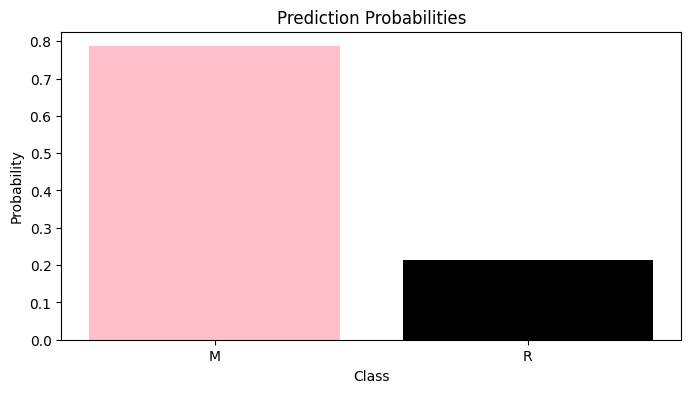

In [34]:
import matplotlib.pyplot as plt

# Mendapatkan probabilitas prediksi untuk setiap kelas
prediction_prob = model.predict_proba(input_data_reshaped)
print("Prediction Probabilities:", prediction_prob)

# Plot probabilitas prediksi
classes = model.classes_
plt.figure(figsize=(8, 4))
plt.bar(classes, prediction_prob[0], color=['pink', 'black'])
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.xticks(classes)
plt.show()
